In [8]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

Exercício 1:

(a) Escreva uma função `convolução_circular(x,h)` que compute a Equação I a partir de vetores $x,h \in \mathbb{C}^N$, devolvendo o vetor $y \in \mathbb{C}^N$.

In [9]:
# Exercício 1(a)
def convolucao_circular(x,h):
  N = len(x)
  y = np.zeros(N)
  for n in range(N):
    for m in range(N):
      y[n] += h[m] * x[(n-m)%N]
  return y

Exercício 1:
(b) Teste sua função usando um sinal $x \in \mathbb{C}^N$ com $N = 1000$ definido por
$$x_n = \sin(2\pi k n/N) + \frac{1}{\sqrt{5}}\sin(2\pi 5n/N) + \frac{1}{\sqrt{50}}\sin(2\pi 50n/N)$$
e usando um vetor $h$ associado ao filtro da média de $L=31$ amostras (Equação II com $M=15$). Plote em um mesmo gráfico o sinal original $x$ e o sinal filtrado $y = x \ast h$. Use o código fornecido ao final para reconfirmar o resultado da sua implementação.

Resultado correto!


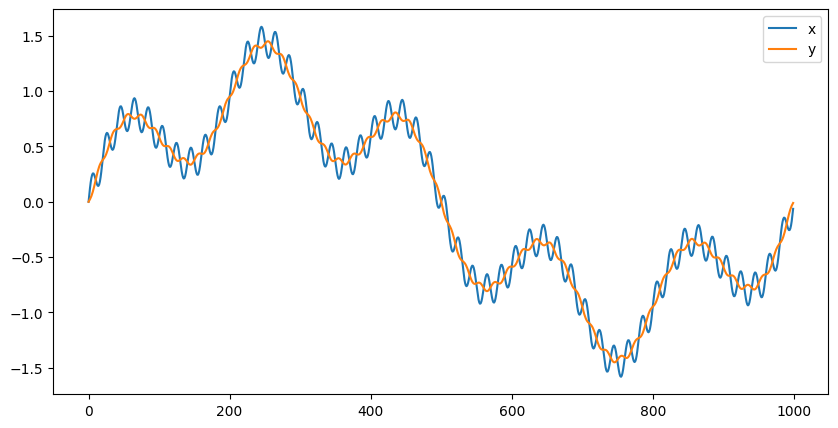

In [13]:
# Exercício 1(b)

x = np.zeros(1000)
for n in range(1000):
  x[n] = m.sin(2*m.pi*n/1000) + m.sin(2*m.pi*5*n/1000)/m.sqrt(5) + m.sin(2*m.pi*50*n/1000)/m.sqrt(50)

h = np.zeros(1000)
for i in range(15):
  h[i] = 1/31
  h[999-i] = 1/31
h[15] = 1/31

y = convolucao_circular(x,h)

y_alt = np.real(np.fft.ifft(np.fft.fft(x)*np.fft.fft(h)))
assert np.linalg.norm(y-y_alt) < 1e-8
print("Resultado correto!")

# plot the x and y signals in the same figure
plt.figure(figsize=(10, 5))
plt.plot(x, label='x')
plt.plot(y, label='y')
#plt.plot(y_alt, label='y_alt')
plt.legend()
plt.show()


Exercício 2:

(a) Escreva uma função `convolução_linear(x,h)` que devolve um vetor $y$ de comprimento `len(x)+len(h)-1` correspondendo à convolução linear entre $x = (x_0, \dots, x_{N-1})$ e $h = (h_0, \dots, h_{L-1})$. Você deverá implementar a convolução linear diretamente a partir da definição (Equação III), considerando $I(x) = {0, 1, \dots, N-1}$ e $I(h) = {0, 1, \dots, L-1}$.

Dica: você pode acrescentar zeros (sentinelas) à esquerda e à direita do vetor $x$ para facilitar (muito) a implementação. O vetor $y$ devolvido, de comprimento `len(x) + len(h) - 1`, corresponderá aos valores $y_{-L+1}, \dots, y_{N-1}$, ou seja, aos índices $n = -L + 1, \dots, N-1$ na Equação III.

In [15]:
# Exercício 2(a)
def convolucao_linear(x,h):

  x_ext = np.zeros(len(x) + 2*len(h) - 2)
  # os primeiros len(h)-1 elementos e os últimos len(h)-1 elementos de x_ext são zeros
  for n in range(len(x)):
    x_ext[n+len(h)-1] = x[n]

  N = len(x) + len(h) - 1
  y = np.zeros(N)
  for n in range(len(y)):
    for m in range(len(h)):
      y[n] = h[m] * x_ext[(n+len(h)-1) - m]

  return y